# ex_09

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
import pandas as pd
from scipy import fftpack
from matplotlib import pyplot as plt


%matplotlib inline

In [2]:
def f(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2) #x restricted to -2 < x < 2
y = np.linspace(-1, 1) #y restricted to -1 < y < 1
xg, yg = np.meshgrid(x, y) 

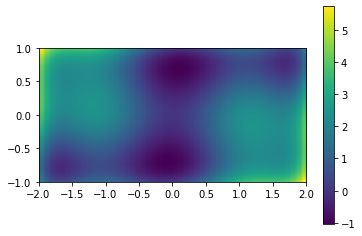

In [3]:
# For plotting 2D
plt.figure()
plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

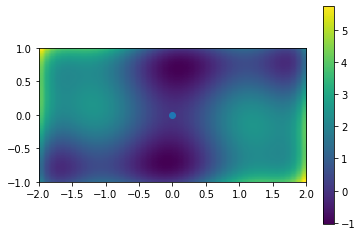

In [4]:
x_min = optimize.minimize(f, x0=[0, 0])

plt.figure()
# Show the function in 2D
plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

In [5]:
from scipy.optimize import fmin

fmin(f,[0,0]) 
#optimize.minimize(f, x0=[0, 0])

Optimization terminated successfully.
         Current function value: -1.031628
         Iterations: 52
         Function evaluations: 101


array([-0.08985145,  0.71266538])

In [7]:
#For finding global and local minimas
import pandas as pd

bnds = ((-2,2), (-1, 1))  #search range
minimas_list = [] 
for i in range(100):
    #used optimization in a loop with a random starting points inside the boundries


    x_init = np.random.uniform(low=bnds[0][0], high=bnds[0][1])
    y_init = np.random.uniform(low=bnds[1][0], high=bnds[1][1])

    min_test = optimize.minimize(f,[x_init, y_init], bounds = bnds)

    minimas_list.append([list(min_test.x)[0],list(min_test.x)[1], float(min_test.fun)]) #created list of minimums that i found


minima_df = pd.DataFrame(minimas_list,columns=["x","y","f(x,y)"]) #made them a dataframe so it will be easier to operate


minima_df = minima_df.round(5) #rounded after 0.0000... because eventhough it finds same values after some decimal it changes
minima_df.drop_duplicates() #i dropped duplicates to find the local and global minimums

minima_df_cols = minima_df.drop_duplicates()

minima_df_cols #unique minimas that we found.

,x,y,"f(x,y)"
0,0.08984,-0.71266,-1.03163
6,-0.08984,0.71266,-1.03163
11,-1.70361,0.79608,-0.21546
24,1.60710,0.56865,2.10425
25,1.70361,-0.79608,-0.21546
47,-1.60710,-0.56865,2.10425
94,1.70361,-0.79609,-0.21546


Text(0.5, 0, 'f(x, y)')

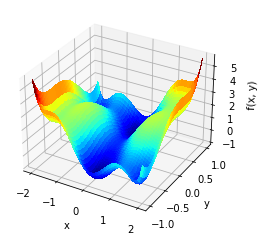

In [8]:
# 3D surface plot of the function
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, f([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')



2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

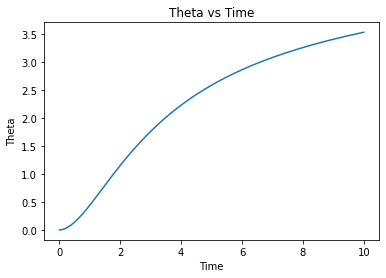

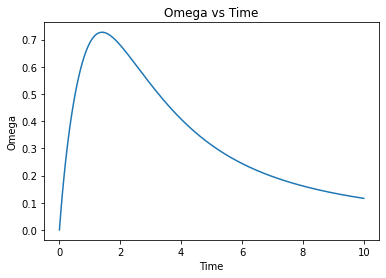

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function to return the derivatives of the state variables
def pendulum_ode(state, t, Q, d, omega):
    theta, omega = state
    d_state = [omega, -Q*omega + np.sin(theta) + d*np.cos(omega*t)]
    return d_state

# Initial conditions
theta0, omega0 = 0, 0

# Parameters
Q, d, omega = 2.0, 1.5, 0.65

# Time range
t = np.linspace(0, 10, 200)

# Solve the ODE
state = odeint(pendulum_ode, [theta0, omega0], t, args=(Q, d, omega))
theta, omega = state.T

# Plot theta vs time
plt.figure()
plt.plot(t, theta)
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Theta vs Time')

# Plot omega vs time
plt.figure()
plt.plot(t, omega)
plt.xlabel('Time')
plt.ylabel('Omega')
plt.title('Omega vs Time')

plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

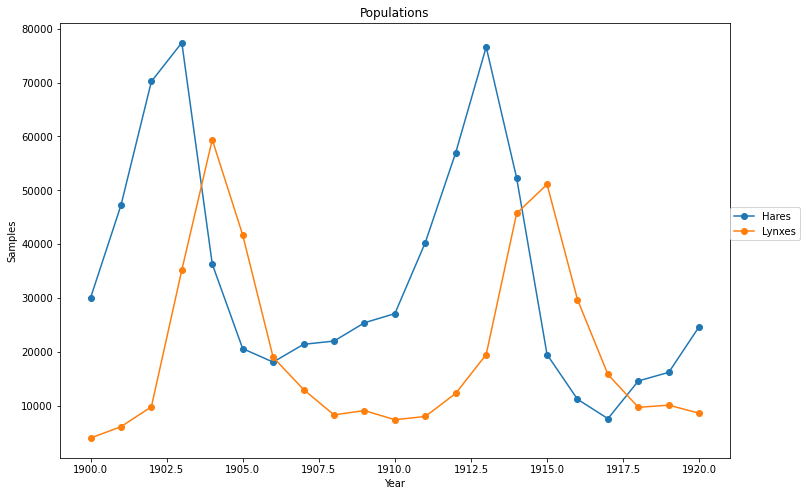

Population period:  10.5


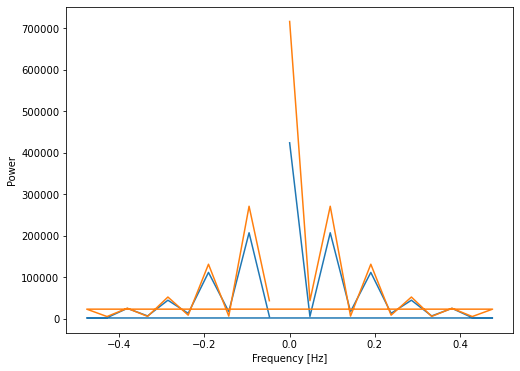

In [21]:
data = np.loadtxt('populations.txt')
#loading data from file
year, hares, lynxes, carrots = data.T

fig = plt.figure(figsize = (12, 8))
plt.plot(year, hares, '-o', year, lynxes, '-o')
plt.title('Populations')
plt.xlabel('Year')
plt.ylabel('Samples')
plt.legend( ('Hares', 'Lynxes'), loc=(1.00, 0.5) )
plt.show()

lpop_fft = fftpack.fft(lynxes)
hpop_fft = fftpack.fft(hares)

t_step = 1 #year
lsample_freq = fftpack.fftfreq(lynxes.size, d=t_step)
lpower = np.abs(lpop_fft)
hsample_freq = fftpack.fftfreq(hares.size, d=t_step)
hpower = np.abs(hpop_fft)

plt.figure(figsize=(8, 6))
plt.plot(lsample_freq, lpower,hsample_freq, hpower)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

pos_mask = np.where(lsample_freq > 0)
freqs = lsample_freq[pos_mask]
powes = lpower[pos_mask]
# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Population period: ", 1/peak_freq) #Hares have the same peak frequency

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

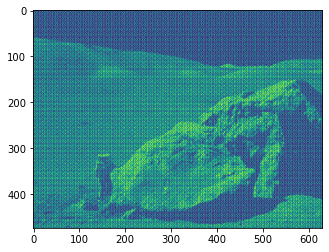

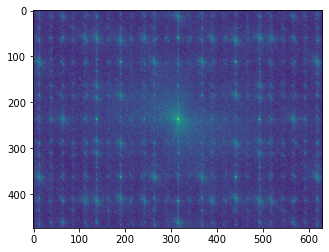

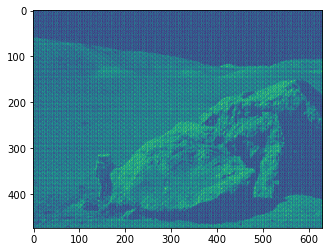

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft2, ifft2, fftshift
from matplotlib.colors import LogNorm

# Import image as 2D numpy array
image = plt.imread("moonlanding.png")

# Show original image
plt.imshow(image)
plt.show()

# Perform 2D FFT on the image
fourier_transform = fft2(image)

# Plot the spectrum (Fourier transform) of the image
plt.imshow(np.abs(fftshift(fourier_transform)), norm=LogNorm(vmin=5))
plt.show()

# Locate the regions of the power spectrum that contain the signal and noise
# Set the noise regions to zero using array slicing
fourier_transform[100:200, 100:200] = 0

# Perform inverse Fourier transform to get the resulting image
resulting_image = np.abs(ifft2(fourier_transform))

# Show the resulting image
plt.imshow(resulting_image)
plt.show()
